In [1]:
include("LabTools.jl")
using .LabTools

# Вариант 8 

## Задание 1

Вычислить абсолютную погрешность значения функции $u(x, y, z) = \frac{x^3 y^4}{z^2}$, если заданы $x^* = 37.1, y^* = 9.87, z^* = 6.052, \epsilon(x^*) = 0.01, \epsilon(y^*) = 0.005, \epsilon(z^*) = 0.002.$

Введем данные:

In [2]:
x = exval(37.1, 0.371)
y = exval(9.87, 0.04935)
z = exval(6.052, 0.012104)

exval(6.052, 0.012104)

Проверим правильность данных:

In [3]:
println("eps_x = $(ϵ(x))") 
println("eps_y = $(ϵ(y))") 
println("eps_z = $(ϵ(z))")

eps_x = 0.01
eps_y = 0.005
eps_z = 0.002


Находим ответ:

In [4]:
u = (x^3.0 * y^4.0) /(z^2.0)

exval(1.3230994862998588e7, 477050.30403942056)

In [5]:
print("Абсолютная погрешность: $(u.σ)")

Абсолютная погрешность: 477050.30403942056

## Задание 2

Определить оптимальный шаг численного дифференциирования при $M_3 = 50$, если абсолютная погрешность $f(x+h), f(x)$ не превосходит $E = 0.1$, для метода:
\begin{equation*}
    f^{'}(x) \approx \frac{f(x+h) - f(x-h)}{2h}
\end{equation*}

Находим:
\begin{equation*}
    \sigma = \sigma_1 + \sigma_2, \text{Где } \sigma_1 \text{---погрешность метода, а } \sigma_2 \text{---погрешность округления}
\end{equation*}

\begin{equation*}
    \sigma_1 = |f^{'}(x) - \frac{f(x) + f^{'}(x)h + \frac{f^{''}(x)h^2}{2} + \frac{f^{'''}(x)h^3}{6} - f(x) + f^{'}(x)h - \frac{f^{''}(x)h^2}{2} + \frac{f^{'''}(x)h^3}{6}}{2h}| \le \frac{M_3 h^3}{6}
\end{equation*}

\begin{equation*}
    \sigma_2 = |f^{'}(x) - \frac{f(x+h) - f(x-h) + 2E}{2h}| \le \frac{E}{h}
\end{equation*}

\begin{equation*}
    \sigma = \frac{M_3 h^3}{6} + \frac{E}{h} \rightarrow h_0 = \sqrt[3]{\frac{3E}{M_3}}
\end{equation*}

In [6]:
M_3 = 50
E = 0.1
h_0(e, m) = cbrt(3*e / m)

print("Оптимальный шаг численного дифференциирования: h_0 = $(h_0(E, M_3))") 

Оптимальный шаг численного дифференциирования: h_0 = 0.18171205928321396

┌ Info: Saved animation to /Users/artem1/Documents/comp/movegraph.gif
└ @ Plots /Users/artem1/.julia/packages/Plots/7R93Y/src/animation.jl:156


Plots.AnimatedGif("/Users/artem1/Documents/comp/movegraph.gif")
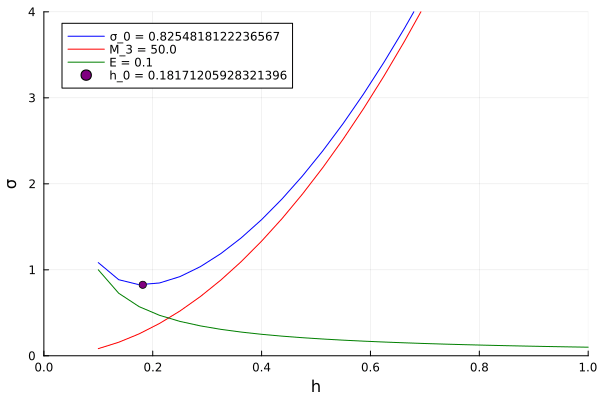

In [7]:
using Plots; gr()

anim = @animate for i ∈ range(0, 2π, 100)
    m = M_3 + (M_3/2 * sin(i))
    e = E + (E/2 * sin(-i))
    h = h_0(e, m)
    σ_1(h) = m * (h^2) / 6 
    σ_2(h) = e / h 
    σ(h) = σ_1(h) + σ_2(h)
    ξ = range(0.1, 1, 25)
    σ_0 = σ(h)
    plot(ξ, σ.(ξ), xlims=(0,1), ylims=(0,4), xlabel="h", ylabel="σ", label="σ_0 = $σ_0", color="blue", legend=:topleft)
    plot!(ξ, σ_1.(ξ), label="M_3 = $m", color="red")
    plot!(ξ, σ_2.(ξ), label="E = $e", color="green")
    scatter!([h], [σ_0], color="purple", label="h_0 = $h")
end

gif(anim, "movegraph.gif", fps = 8)